## Random Forest
___________

Instead of training one Decision Tree on all data (we know that it can be overfitted), we take many Decision Trees.
Then we show a subset of data to each of the tree. Obviously, each of these trees is smaller than one big tree. And each of these trees can be overfitted but that's not a disadvantage! 

After training all of these trees, we get predicted values from each of the tree. The mean probability of these results would be our target probability.

The more trees are in Random Forest, the better (of course it impacts on calculation time/complexity)

### Practice with Titanic data

#### Preprocessing the Data (Titanic)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split

titanic_data = pd.read_csv('data/train.csv')
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#### Training model (Random Forest)

In [2]:
from sklearn.ensemble import RandomForestClassifier

# define classifier (Random Forest)
clf_rf = RandomForestClassifier()

# Choose parameters' ranges
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}  

# define model with parameters and cross validation
grid_search_cv_clf_rf = GridSearchCV(clf_rf, parameters, cv=5)

# train this model
grid_search_cv_clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [3]:
# get the best parameters
grid_search_cv_clf_rf.best_params_

{'max_depth': 5, 'n_estimators': 30}

#### Model tuning (try parameters)

In [4]:
# this is our best classifier that we got based on the range of parameters defined earlier
# we can predict on test data using this model
best_clf = grid_search_cv_clf_rf.best_estimator_

In [5]:
# get the accuracy
best_clf.score(X_test, y_test)

0.823728813559322

In [6]:
# an array of features importances
feature_importances = best_clf.feature_importances_
feature_importances

array([0.12308509, 0.09648934, 0.03830305, 0.03901559, 0.1490545 ,
       0.17928107, 0.33597957, 0.01754228, 0.00672607, 0.01452343])

In [7]:
# a df of features sorted by their importance in the model
feature_importances_df = pd.DataFrame({'features': list(X_train), 
                                       'feature_importances': feature_importances}) \
    .sort_values('feature_importances', ascending=False)

In [8]:
feature_importances_df

,features,feature_importances
6,Sex_male,0.335980
5,Sex_female,0.179281
4,Fare,0.149055
0,Pclass,0.123085
1,Age,0.096489
3,Parch,0.039016
2,SibSp,0.038303
7,Embarked_C,0.017542
9,Embarked_S,0.014523
8,Embarked_Q,0.006726


<AxesSubplot:ylabel='feature_importances'>

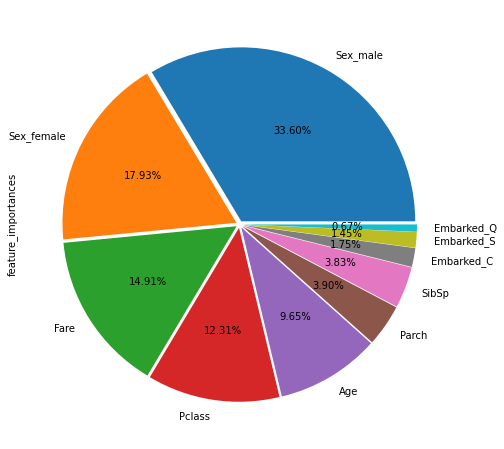

In [9]:
feature_importances_df.plot.pie(y = 'feature_importances', 
                                explode = [0.02]*10,
                                labels = feature_importances_df.features,
                                legend = False,
                                figsize = (8, 8),
                                autopct='%1.2f%%')

### Practice with Heart Disease data

Create a feature importance list

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [11]:
np.random.seed(0)

df = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')

X_train = df.drop('target', axis=1)
y_train = df.target

In [12]:
rf = RandomForestClassifier(10, max_depth=5)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [13]:
rf.feature_importances_

array([0.04344095, 0.0399895 , 0.1399832 , 0.0535693 , 0.05688662,
       0.00849278, 0.01858343, 0.12954976, 0.04807909, 0.11664461,
       0.06920762, 0.07704782, 0.19852531])

<AxesSubplot:>

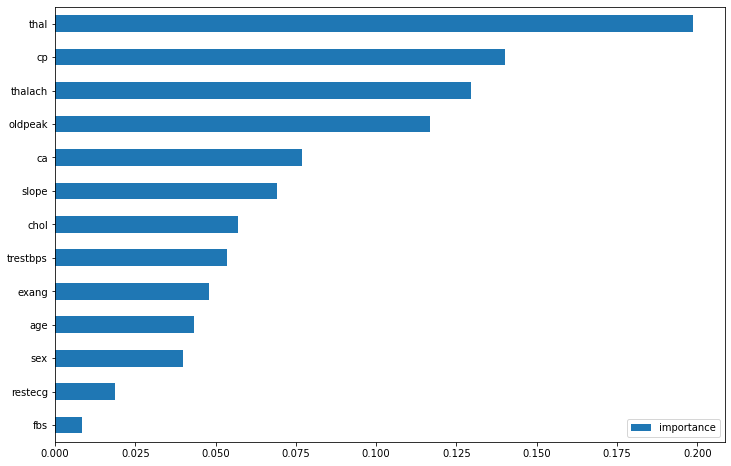

In [14]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

### Practice with Mushrooms data

#### Find the best parameters, train and predict

We are given:
- train data (last column is the target variable)
- test data for prediction
- ranges of parameters to check.

Tasks:
- to find best parameters for a Random Forest
- to define features importances
- to run best model on test data
- calculate number of 1-class in test data

Parameters:

- n_estimators: from 10 to 50 with step 10
- max_depth: from 1 to 12 with step 2
- min_samples_leaf: from 1 to 7
- min_samples_split: from 2 to 9 with step 2

In [15]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# load data and separate X_train and target 'y' (last column)
df = pd.read_csv('data/training_mush.csv')
X_train = df.drop(df.columns[-1], axis=1)
y = df.iloc[:,-1]
X_test = pd.read_csv('data/testing_mush.csv')

# Declare classificator and ranges of parameters
clf = RandomForestClassifier(random_state=0)
params = {'n_estimators': range(10, 50, 10), 
          'max_depth': range(1, 12, 2), 
          'min_samples_leaf': range(1, 7), 
          'min_samples_split': range(2, 9, 2)}

# train the models
grid = GridSearchCV(clf, param_grid=params, cv=3, n_jobs=-1)
grid.fit(X_train, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [16]:
# get the parameters from the best trained model
print(grid.best_params_)

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [17]:
# Get the best model
best = grid.best_estimator_

In [19]:
# Define a list feature importances and sort it
feature_importances_df = pd.DataFrame({'features': list(X_train), 
                                       'feature_importances': best.feature_importances_}) \
    .sort_values('feature_importances', ascending=False)

feature_importances_df

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [20]:
# run model on test data
y_pred = best.predict(X_test)

# calculate number of 1-class in test data
np.sum(y_pred)

976

### Practice with Space Ships data

#### Predict space ship types

We are given:
- train data (column 'class' is the target variable)
- test data for prediction

Tasks:
- predict ship types in a test dataset
- what parameter is the most important?

In [21]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# load datasets and separate X_train and target 'y'
space_ships_train = pd.read_csv('data/invasion.csv')
space_ships_test = pd.read_csv('data/operative_information.csv')
X_train = space_ships_train.drop('class', axis=1)
y_train = space_ships_train['class']
X_test = space_ships_test

# declare a classificator and parameters
clf = RandomForestClassifier(criterion='gini')
params = {'n_estimators': range(1, 20, 2), 
          'max_depth': range(1, 12, 2), 
          'min_samples_leaf': range(1, 8), 
          'min_samples_split': range(2, 11, 2)}

# train models
grid_clf = GridSearchCV(clf, params, cv=3, n_jobs=-1)
grid_clf.fit(X_train, y_train)

# get the best model
best_clf = grid_clf.best_estimator_

# predict test data
y_pred = best_clf.predict(X_test)

In [22]:
# find out how many ships of each type in test data
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [23]:
# create a table with feature importance
features_importance = pd.DataFrame({'features': X_test.columns, 
                                    'importance': best_clf.feature_importances_}).sort_values('importance', ascending=False)

features_importance

,features,importance
5,volume,0.459979
0,g_reflection,0.251517
1,i_reflection,0.214983
3,brightness,0.073521
2,speed,0.000000
4,time_of_observance,0.000000
